<a href="https://colab.research.google.com/github/Foawziah/Datascience/blob/master/body_part_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#mounting google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#importing all required packages
import os
import numpy as np
from keras import layers
from keras import models
from tensorflow.keras.applications import VGG16
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import optimizers
from tensorflow.keras import regularizers
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [ ]:
#regularization parameter
param=1e-3
#pretrained model vgg16 for image classifiation
conv_base = VGG16(weights='imagenet', 
                  include_top=False, 
                  input_shape=(150, 150, 3))
#building the model using vgg16 as convolutional base to learn general features and dense layers
model = models.Sequential()
model.add(conv_base)
#flattening convolutional base
model.add(layers.Flatten())
#using regularizers in dense layers to avoid overfitting
model.add(layers.Dense(256, activation='relu',
                      kernel_regularizer=regularizers.L2(param),
                      bias_regularizer=regularizers.L2(param)))
#dropping 30% of neurons to avoid overfitting
model.add(layers.Dropout(0.3))
#last layer consist of 9 output units as we have 9 classes in total
model.add(layers.Dense(9, activation='softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 4, 4, 512)         14714688  
                                                                 
 flatten_1 (Flatten)         (None, 8192)              0         
                                                                 
 dense_2 (Dense)             (None, 256)               2097408   
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                                 
 dense_3 (Dense)             (None, 9)                 2313      
                                                                 
Total params: 16,814,409
Trainable params: 16,814,409
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#directory which contains our data
base_dir = '/content/drive/MyDrive/BodyPart'
#directory for training data
train_dir = os.path.join(base_dir, 'Training')
#directory for testing data
test_dir = os.path.join(base_dir, 'Testing')
#datagenerator for training and validation data
datagen = ImageDataGenerator(rescale=1./255,
                             validation_split=0.2)#20% of training data is used for validation
#training data
train_generator = datagen.flow_from_directory(train_dir,
                                                    target_size=(150, 150),
                                                    batch_size=20,
                                                    class_mode='categorical',
                                                    subset='training')
#validation data
validation_generator = datagen.flow_from_directory(train_dir,
                                                        target_size=(150, 150),
                                                        batch_size=20,
                                                        class_mode='categorical',
                                                        subset='validation')


Found 1832 images belonging to 9 classes.
Found 455 images belonging to 9 classes.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# New Section

In [ ]:
#compiling the model
model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.Adam(learning_rate=1e-4),
              metrics=['acc'])
#training the model
history = model.fit(train_generator,
                    epochs=5,
                    batch_size=64,
                    validation_data=validation_generator)
model.save('/content/drive/MyDrive/BodyPart/model.h5')

Epoch 1/5
92/92 [==============================] - 66s 705ms/step - loss: 0.1459 - acc: 0.9842 - val_loss: 0.2080 - val_acc: 0.9670
Epoch 2/5
92/92 [==============================] - 64s 697ms/step - loss: 0.1302 - acc: 0.9858 - val_loss: 0.3013 - val_acc: 0.9451
Epoch 3/5
92/92 [==============================] - 64s 696ms/step - loss: 0.1587 - acc: 0.9798 - val_loss: 0.2600 - val_acc: 0.9495
Epoch 4/5
92/92 [==============================] - 64s 693ms/step - loss: 0.1289 - acc: 0.9842 - val_loss: 0.2750 - val_acc: 0.9560
Epoch 5/5
92/92 [==============================] - 64s 693ms/step - loss: 0.1052 - acc: 0.9951 - val_loss: 0.1899 - val_acc: 0.9802


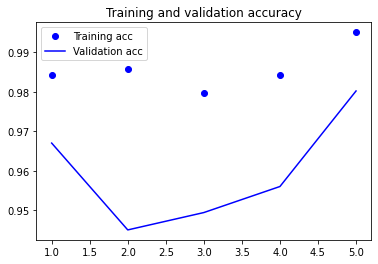

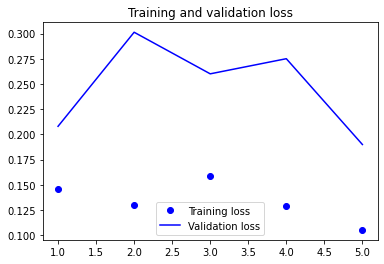

In [ ]:
#plotting training and validation accuracy
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
#plotting training and validation loss
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [ ]:
#datagenerator for testing data
test_datagen = ImageDataGenerator(rescale=1./255)
#test data
test_generator = test_datagen.flow_from_directory(test_dir,
                                                  target_size=(150, 150),
                                                  batch_size=20,

                                                  class_mode='categorical')

Found 293 images belonging to 9 classes.


In [ ]:
#predicting the model for testing data
y_pred= model.predict(test_generator)
#testing labels
y_true= test_generator.classes
#finding confusion matrix for test data
cnf_matrix= confusion_matrix(y_true,np.rint(y_pred).argmax(axis=1))
print('Confusion Matrix:\n',cnf_matrix)

Confusion Matrix:
 [[ 0  4  2  4  4  3  4  5  4]
 [ 5  4  1  3  6  2  4  2  3]
 [ 3  1  4  4  6  2  3  2  5]
 [ 1  4  3  0 10  2  4  1  5]
 [ 8  7  7  6  7  4  5  7  5]
 [ 2  3  4  3  2  5  6  3  1]
 [ 4  5  2  4  4  2  2  1  4]
 [ 3  2  2  2  6  3  1  7  4]
 [ 5  3  5  2  7  1  3  2  2]]


In [ ]:
#False Positives
FP = cnf_matrix.sum(axis=0) - np.diag(cnf_matrix)
#False Negatives
FN = cnf_matrix.sum(axis=1) - np.diag(cnf_matrix)
#True Positives
TP = np.diag(cnf_matrix)
#True Negatives
TN = cnf_matrix.sum() - (FP + FN + TP)
# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/(TP+FN)
# Specificity or true negative rate
TNR = TN/(TN+FP) 
# Precision or positive predictive value
PPV = TP/(TP+FP)
# Overall accuracy for each class
ACC = (TP+TN)/(TP+FP+FN+TN)

In [ ]:
print('Sensitivity:\n',TPR)
print('Specificity:\n',TNR)
print('Precision:\n',PPV)
print('Overall Accuracy for each class:\n',ACC)

Sensitivity:
 [0.1        0.13333333 0.16666667 0.13333333 0.25       0.03448276
 0.03571429 0.13333333 0.16666667]
Specificity:
 [0.88973384 0.90874525 0.8973384  0.90874525 0.8185654  0.90530303
 0.89056604 0.89353612 0.91254753]
Precision:
 [0.09375    0.14285714 0.15625    0.14285714 0.24561404 0.03846154
 0.03333333 0.125      0.17857143]
Overall Accuracy for each class:
 [0.80887372 0.82935154 0.8225256  0.82935154 0.70989761 0.81911263
 0.80887372 0.81569966 0.83617747]


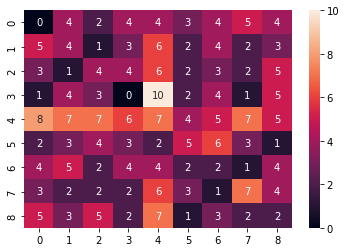

In [ ]:
#generating heat map for confusion matrix
sns.heatmap(cnf_matrix, annot=True)